In [1]:
import pandas as pd
import os
import numpy as np

from utils import print_stats

from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
outcomes_df = pd.read_csv('../data/outcomes_updated.csv')

# Load in sets
training_set = pd.read_csv('../data/train_set.csv').values.flatten().tolist()
val_set = pd.read_csv('../data/val_set.csv').values.flatten().tolist()

print('Traning set size:', len(training_set))
print('Val set size:', len(val_set))

outcomes_train_subset = outcomes_df.loc[outcomes_df['studyid'].isin(training_set)]
outcomes_val_subset = outcomes_df.loc[outcomes_df['studyid'].isin(val_set)]

Traning set size: 291
Val set size: 41


norm_str: 
AUC: 0.66
Acc: 0.68
Sens: 0.24
Spec: 1.0
PPV: 1.0
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


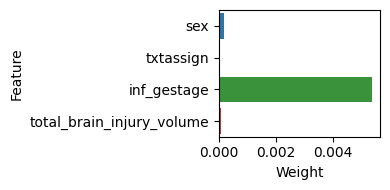

norm_str: _minmax
AUC: 0.57
Acc: 0.51
Sens: 0.65
Spec: 0.42
PPV: 0.44
NPV: 0.62


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


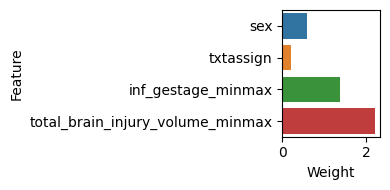

norm_str: _zscore
AUC: 0.64
Acc: 0.56
Sens: 0.59
Spec: 0.54
PPV: 0.48
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


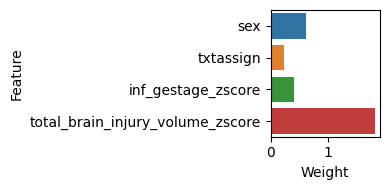

In [3]:
base_cols = ['sex', 'txtassign']
other_features = ['inf_gestage', 'total_brain_injury_volume']
norm_str = ['', '_minmax', '_zscore']

for i in range(len(norm_str)):
    updated_features = [x + norm_str[i] for x in other_features]
    all_features = base_cols + updated_features

    baseline_lr = LogisticRegression()
    baseline_lr.fit(outcomes_train_subset[all_features], outcomes_train_subset['primary_all'])
    proba_preds = baseline_lr.predict_proba(outcomes_val_subset[all_features])[:, 1]

    print('norm_str:', norm_str[i])
    print_stats(proba_preds, outcomes_val_subset['primary_all'].values)

    weight_df = pd.DataFrame({'Feature': all_features, 'Weight': np.abs(baseline_lr.coef_[0])})

    fig, ax = plt.subplots(figsize=(4, 2))
    sns.barplot(x="Weight", y="Feature", data=weight_df)
    plt.tight_layout()
    plt.show()

norm_str: 
AUC: 0.61
Acc: 0.56
Sens: 0.59
Spec: 0.54
PPV: 0.48
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


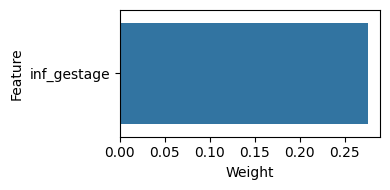

norm_str: _minmax
AUC: 0.61
Acc: 0.56
Sens: 0.59
Spec: 0.54
PPV: 0.48
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


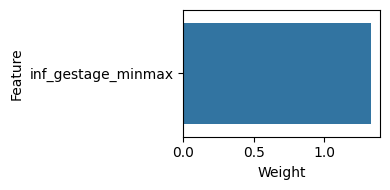

norm_str: _zscore
AUC: 0.61
Acc: 0.56
Sens: 0.59
Spec: 0.54
PPV: 0.48
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


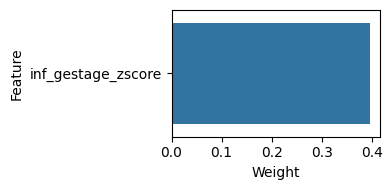

In [4]:
base_cols = []
other_features = ['inf_gestage']
norm_str = ['', '_minmax', '_zscore']

for i in range(len(norm_str)):
    updated_features = [x + norm_str[i] for x in other_features]
    all_features = base_cols + updated_features

    baseline_lr = LogisticRegression()
    baseline_lr.fit(outcomes_train_subset[all_features], outcomes_train_subset['primary_all'])
    proba_preds = baseline_lr.predict_proba(outcomes_val_subset[all_features])[:, 1]

    print('norm_str:', norm_str[i])
    print_stats(proba_preds, outcomes_val_subset['primary_all'].values)

    weight_df = pd.DataFrame({'Feature': all_features, 'Weight': np.abs(baseline_lr.coef_[0])})

    fig, ax = plt.subplots(figsize=(4, 2))
    sns.barplot(x="Weight", y="Feature", data=weight_df)
    plt.tight_layout()
    plt.show()

norm_str: 
AUC: 0.55
Acc: 0.68
Sens: 0.24
Spec: 1.0
PPV: 1.0
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


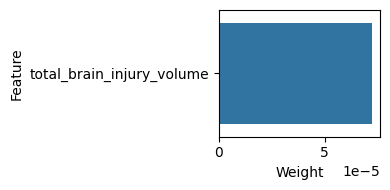

norm_str: _minmax
AUC: 0.55
Acc: 0.68
Sens: 0.24
Spec: 1.0
PPV: 1.0
NPV: 0.65


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


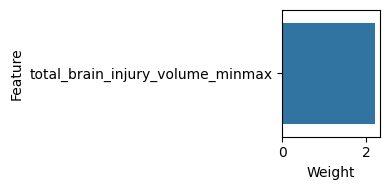

norm_str: _zscore
AUC: 0.57
Acc: 0.68
Sens: 0.29
Spec: 0.96
PPV: 0.83
NPV: 0.66


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


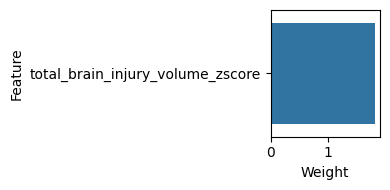

In [5]:
base_cols = []
other_features = ['total_brain_injury_volume']
norm_str = ['', '_minmax', '_zscore']

for i in range(len(norm_str)):
    updated_features = [x + norm_str[i] for x in other_features]
    all_features = base_cols + updated_features

    baseline_lr = LogisticRegression()
    baseline_lr.fit(outcomes_train_subset[all_features], outcomes_train_subset['primary_all'])
    proba_preds = baseline_lr.predict_proba(outcomes_val_subset[all_features])[:, 1]

    print('norm_str:', norm_str[i])
    print_stats(proba_preds, outcomes_val_subset['primary_all'].values)

    weight_df = pd.DataFrame({'Feature': all_features, 'Weight': np.abs(baseline_lr.coef_[0])})

    fig, ax = plt.subplots(figsize=(4, 2))
    sns.barplot(x="Weight", y="Feature", data=weight_df)
    plt.tight_layout()
    plt.show()